In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy.stats as st
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28b1ddf9208>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [11]:
for row in session.query(measurement.date, measurement.prcp).limit(15).all():
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)


In [12]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28b1de73c88>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [14]:
for row in session.query(station.name, station.latitude).limit(15).all():
    print(row)

('WAIKIKI 717.2, HI US', 21.2716)
('KANEOHE 838.1, HI US', 21.4234)
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213)
('PEARL CITY, HI US', 21.3934)
('UPPER WAHIAWA 874.3, HI US', 21.4992)
('WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556)
('WAIHEE 837.5, HI US', 21.45167)
('HONOLULU OBSERVATORY 702.2, HI US', 21.3152)
('MANOA LYON ARBO 785.2, HI US', 21.3331)


In [15]:
scolumns = inspector.get_columns('station')
for s in columns:
    print(s['name'], s["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
measurement_data = pd.read_sql("SELECT * FROM measurement", conn)

In [17]:
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [18]:
station_data = pd.read_sql("SELECT * FROM station", conn)

In [19]:
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [20]:
combined_data = pd.merge(station_data, measurement_data, on="id", how="inner")

In [21]:
combined_data.head()

,id,station_x,name,latitude,longitude,elevation,station_y,date,prcp,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,USC00519397,2010-01-01,0.08,65.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,USC00519397,2010-01-02,0.00,63.0
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0,USC00519397,2010-01-03,0.00,74.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9,USC00519397,2010-01-04,0.00,76.0
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6,USC00519397,2010-01-06,NaN,73.0


# Exploratory Precipitation Analysis

In [22]:
import datetime as dt

In [23]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [25]:
# Perform a query to retrieve the data and precipitation scores
rain = session.query(measurement.date, measurement.prcp).\
filter(measurement.date > query_date)
for measurement in rain:
    print(measurement.date, measurement.prcp)

2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
2016-10-27 0.0
20

2017-04-18 0.0
2017-04-19 None
2017-04-20 None
2017-04-21 None
2017-04-24 None
2017-04-25 None
2017-04-27 None
2017-04-28 None
2017-06-02 None
2017-06-05 None
2017-06-06 None
2017-06-07 None
2017-06-08 None
2017-06-09 None
2017-06-13 None
2017-06-14 None
2017-06-15 None
2017-06-16 None
2017-06-19 None
2017-06-20 None
2017-06-21 None
2017-06-22 0.0
2017-06-23 0.0
2017-06-26 None
2017-06-27 0.0
2017-06-28 0.0
2017-06-29 0.0
2017-06-30 0.12
2017-07-03 None
2017-07-05 None
2017-07-06 None
2017-07-07 None
2017-07-10 None
2017-07-11 None
2017-07-12 None
2017-07-13 None
2017-07-18 0.0
2017-07-19 0.0
2017-07-20 0.0
2017-07-21 0.0
2017-07-25 0.0
2017-07-26 None
2017-07-27 None
2017-07-28 0.01
2017-07-31 None
2016-08-24 1.22
2016-08-25 0.21
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.14
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.25
2016-09-02 None
2016-09-03 0.08
2016-09-04 0.74
2016-09-05 0.02
2016-09-06 0.03
2016-09-07 0.11
2016-09-08 0.01
2016-09-09 0.23
2016-09-10 0.14
2016-09-11 0.12
2016-09

2017-06-21 0.3
2017-06-22 0.28
2017-06-23 0.5
2017-06-24 0.22
2017-06-25 0.5
2017-06-26 0.02
2017-06-27 0.1
2017-06-28 0.02
2017-06-29 0.04
2017-06-30 0.2
2017-07-01 0.1
2017-07-02 0.5
2017-07-03 0.4
2017-07-04 0.0
2017-07-05 0.0
2017-07-06 0.02
2017-07-07 0.3
2017-07-08 0.02
2017-07-09 0.0
2017-07-10 0.02
2017-07-11 0.0
2017-07-12 0.05
2017-07-13 0.68
2017-07-14 0.68
2017-07-15 0.1
2017-07-16 0.5
2017-07-17 0.39
2017-07-18 2.4
2017-07-19 0.27
2017-07-20 0.7
2017-07-21 0.1
2017-07-22 4.0
2017-07-23 0.8
2017-07-24 0.84
2017-07-25 0.3
2017-07-26 0.3
2017-07-27 0.0
2017-07-28 0.4
2017-07-29 0.3
2017-07-30 0.3
2017-07-31 0.0
2017-08-01 None
2017-08-02 0.25
2017-08-03 0.06
2017-08-05 None
2017-08-06 None
2017-08-07 0.05
2017-08-08 0.34
2017-08-09 0.15
2017-08-10 0.07
2017-08-11 None
2017-08-12 0.14
2017-08-13 None
2017-08-14 0.22
2017-08-15 0.42
2017-08-16 0.42
2017-08-17 0.13
2017-08-18 None
2017-08-19 0.09
2017-08-20 None
2017-08-21 0.56
2017-08-22 0.5
2017-08-23 0.45


In [26]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_table = pd.DataFrame(rain)
rain_table.columns = ['date', 'precip']
rain_table.set_index(['date'], inplace = True)
rain_table

,precip
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [27]:
# Sort the dataframe by date
rain_table.sort_values(by='date',ascending=False)
rain_table

,precip
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


Text(0.5, 1.0, 'Preciptation Over 12 mo. Period')

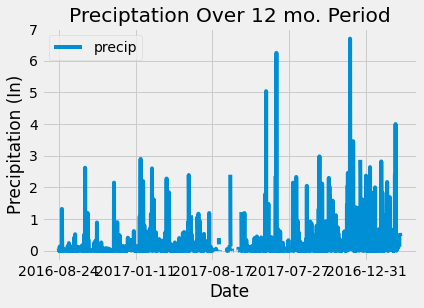

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data

rain_table.plot()
plt.xlabel('Date')
plt.ylabel('Precipitation (In)')
plt.title('Preciptation Over 12 mo. Period')

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_table.describe()

,precip
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(station.station)).all() 
print(f"The total number of stations is {total_stations}.")

The total number of stations is [(9,)].


In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
    
session.query(station.station, func.count(station.station)).group_by(station.station).all()

[('USC00511918', 1),
 ('USC00513117', 1),
 ('USC00514830', 1),
 ('USC00516128', 1),
 ('USC00517948', 1),
 ('USC00518838', 1),
 ('USC00519281', 1),
 ('USC00519397', 1),
 ('USC00519523', 1)]

In [35]:
session.query(station.station).order_by(station.station.desc()).first()

('USC00519523',)

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = [station.station, 
       func.min(station.tobs), 
       func.max(station.tobs), 
       func.avg(station.tobs)]
active_station

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
x = 

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = 12)
 
# Show plot
plt.show()

# Close session

In [ ]:
# Close Session
session.close()